<a href="https://colab.research.google.com/github/chilung/EmotionX2020/blob/master/pr_lab1_0686028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reference
https://archive.ics.uci.edu/ml/datasets/Arcene

In [1]:
import logging

logging.basicConfig(level=logging.DEBUG, format='%(message)s')

logging.debug('Hello Debug')
logging.info('Hello Info')
logging.warning('Hello Warning')
logging.error('Hello Error')
logging.critical('Hello Critical')

Hello Debug
Hello Info
Hello Warning
Hello Error
Hello Critical


In [0]:
import re
import pandas as pd
from io import open
import glob
import os
import numpy as np
import math
from collections import OrderedDict
from collections import Counter
import torch
import torchvision
import heapq
import unicodedata
import string
import urllib.request as urllib

#Class Definition
We set w0 as 1 and w1 as -1.

In [0]:
w0 = 1
w1 = -1

#Dataset
The number of train dataset is 100 with 10000 features.
The number of valid dataset is also 100 with 10000 features.

In [0]:
def get_data_from_http(http_addr):
  http_data = urllib.urlopen(http_addr)

  data_collect = {}
  for i, data in enumerate(http_data):
    data_list = [d for d in data.decode("utf-8").split(' ')]
    data_collect[i] = [int(d) for d in data_list if d != '\n']
  
  return data_collect

In [5]:
train_data_http_addr = "https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/ARCENE/arcene_train.data"
valid_data_http_addr = "https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/ARCENE/arcene_valid.data"

train_dataset = get_data_from_http(train_data_http_addr)
logging.info("number of train data set: {}".format(len(train_dataset)))
logging.info("number of train data feature: {}".format(len(train_dataset[0])))
logging.info("type of data: {}".format(type(train_dataset[0][0])))
logging.debug("the first train data: {}".format(train_dataset[0]))

valid_dataset = get_data_from_http(valid_data_http_addr)
logging.info("number of valid data set: {}".format(len(valid_dataset)))
logging.info("number of valid data feature: {}".format(len(valid_dataset[0])))
logging.info("type of data: {}".format(type(valid_dataset[0][0])))
logging.debug("the first valid data: {}".format(valid_dataset[0]))

number of train data set: 100
number of train data feature: 10000
type of data: <class 'int'>
the first train data: [0, 71, 0, 95, 0, 538, 404, 20, 0, 0, 0, 0, 17, 0, 239, 0, 0, 0, 0, 0, 0, 0, 30, 0, 89, 262, 0, 147, 389, 0, 0, 103, 19, 9, 2, 0, 0, 0, 0, 0, 0, 0, 0, 14, 3, 0, 0, 0, 0, 39, 0, 0, 46, 271, 0, 0, 2, 0, 0, 10, 0, 58, 91, 0, 0, 0, 131, 87, 454, 1, 40, 0, 44, 144, 0, 58, 0, 0, 0, 0, 0, 0, 65, 0, 0, 0, 479, 4, 0, 0, 352, 127, 53, 0, 0, 0, 0, 79, 4, 0, 123, 147, 42, 149, 0, 0, 148, 0, 0, 0, 548, 0, 132, 0, 42, 42, 271, 0, 42, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 98, 74, 0, 0, 0, 63, 0, 0, 230, 0, 0, 1, 570, 0, 36, 2, 0, 102, 0, 0, 0, 80, 0, 0, 0, 0, 45, 497, 48, 0, 0, 0, 0, 0, 64, 38, 51, 240, 34, 0, 0, 617, 126, 0, 0, 228, 382, 367, 0, 16, 0, 0, 0, 180, 0, 117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 77, 95, 54, 0, 4, 0, 0, 0, 0, 0, 0, 0, 123, 466, 54, 0, 0, 314, 0, 0, 120, 0, 0, 85, 343, 0, 0, 32, 0, 0, 0, 0, 0, 356, 0, 0, 42, 0, 0, 0, 25, 0, 7, 223, 0, 0, 75, 0, 0, 0, 0, 0, 134, 0, 55,

In [0]:
def get_label_from_http(http_addr):
  http_label = urllib.urlopen(http_addr)

  label_collect = []
  for i, label in enumerate(http_label):
    label_collect = label_collect + [int(d) for d in label.decode("utf-8").split('\n') if d != '']
  
  return label_collect

In [7]:
train_label_http_addr = "https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/ARCENE/arcene_train.labels"
valid_label_http_addr = "https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/arcene_valid.labels"

train_label = get_label_from_http(train_label_http_addr)
logging.info("number of train label: {}".format(len(train_label)))
logging.info("type of label: {}".format(type(train_label[0])))
logging.debug("the train label: {}".format(train_label))

valid_label = get_label_from_http(valid_label_http_addr)
logging.info("number of valid label: {}".format(len(valid_label)))
logging.info("type of label: {}".format(type(valid_label[0])))
logging.debug("the valid label: {}".format(valid_label))

number of train label: 100
type of label: <class 'int'>
the train label: [1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1]
number of valid label: 100
type of label: <class 'int'>
the valid label: [-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1]


#Calculate the Mean of a specified Feature in Specified Class
Function `mean_feature_class(data, label, f_index, class_set)`, the input paprmeters should be:
*   data: the whole dataset
*   label: the label of the data
*   f_index: feature index of the data, start from 0
*   class_set: 1 or -1 specified in the corresponding label

In [8]:
def mean_feature_class(data, label, f_index, class_set):
  logging.debug([format(data[i][f_index]) for i in data])
  logging.debug(label)
  logging.debug([data[i][f_index] for i in data if label[i] == class_set])
  return np.mean([data[i][f_index] for i in data if label[i] == class_set])

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  logging.debug("mean of feature 0 in class 1: {}".format(mean_feature_class(train_dataset, train_label, 0, 1)))
  logging.debug("mean of feature 0 in class -1: {}".format(mean_feature_class(train_dataset, train_label, 0, -1)))

['0', '0', '0', '0', '105', '38', '76', '47', '0', '38', '0', '17', '0', '106', '7', '71', '13', '0', '132', '3', '29', '168', '0', '0', '28', '10', '95', '0', '90', '39', '18', '0', '6', '74', '0', '59', '0', '23', '0', '0', '0', '18', '0', '137', '0', '111', '0', '49', '0', '0', '21', '0', '26', '170', '0', '158', '11', '41', '6', '0', '17', '87', '169', '3', '0', '0', '0', '63', '37', '100', '0', '36', '7', '29', '57', '21', '1', '0', '98', '0', '49', '107', '28', '0', '26', '188', '68', '0', '0', '5', '139', '0', '0', '119', '138', '24', '40', '2', '8', '0']
[1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1]
[0, 0, 0, 76, 17, 106, 71, 0, 95, 90, 18, 0, 6, 59, 0, 0, 137, 0, 0, 0, 0,

#Calculate the Variance of a specified Feature in Specified Class
Function `var_feature_class(data, label, f_index, class_set)`, the input paprmeters should be:
*   data: the whole dataset
*   label: the label of the data
*   f_index: feature index of the data, start from 0
*   class_set: 1 or -1 specified in the corresponding label

In [9]:
def var_feature_class(data, label, f_index, class_set):
  logging.debug([format(data[i][f_index]) for i in data])
  logging.debug(label)
  logging.debug([data[i][f_index] for i in data if label[i] == class_set])
  return np.var([data[i][f_index] for i in data if label[i] == class_set])

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  logging.debug("var of feature 0 in class 1: {}".format(var_feature_class(train_dataset, train_label, 8588, 1)))
  logging.debug("var of feature 0 in class -1: {}".format(var_feature_class(train_dataset, train_label, 8588, -1)))

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
[1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
var of fe

#Features Selection According to H0 Test
```
g = ((xbar-ybar) - (ux-uy)) / sqrt(xvar/Nx + xvar/Ny)
where
g is the H0 test variable
xbar is the sample mean of specified feature in class 1
ybar is the sample mean of specified feature in class -1
ux is the real mean of specified feature in class 1
uy is the real mean of specified feature in class -1
xvar is the variance of specified feature in class 1
yvar is the variance of specified feature in class -1
Nx is the number of data of specified feature in class 1
Ny is the number of data of specified feature in class -1
```
We will have a hypothesis that ux = uy by setting ux-uy = 0 and to see if we can reject the H0 hypothesis in order to select the specified feature. In `reject_h0_hypothesis(data, label, f_index = 0, conf_level = 0.8)`, data is the dataset, label is the label corrseponding to the dataset data, f_index is the feature index, and conf_level is the confidence level as list in acceptance_interval collection.



In [10]:
# def h0_hypothesis
# (mean_feature_class(train_dataset, train_label, 0, 1) - ) / math.sqrt() 

acceptance_interval = {0.8: 1.282, 0.85: 1.440, 0.9: 1.645, 0.95: 1.967, 0.98: 2.326, 0.99: 2.576, 0.998: 3.090, 0.999: 3.291}
  
def reject_h0_hypothesis(data, label, f_index = 0, conf_level = 0.8):

  xbar = mean_feature_class(data, label, f_index, w0)
  ybar = mean_feature_class(data, label, f_index, w1)
  xvar = var_feature_class(data, label, f_index, w0)
  yvar = var_feature_class(data, label, f_index, w1)
  Nx = len([label[i] for i in range(len(label)) if label[i] == w0])
  Ny = len([label[i] for i in range(len(label)) if label[i] == w1])

  if((xvar + yvar) == 0):
    logging.debug("feature {}: xvar: {}, yvar{}".format(f_index, xvar, yvar))
    return False

  g = (xbar-ybar) / math.sqrt((xvar/Nx) + (yvar/Ny))
  return (abs(g) > acceptance_interval[conf_level])

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  logging_level = logging.getLogger().getEffectiveLevel()
  logging.getLogger().setLevel(logging.INFO)
  
  # for i in range(len(train_dataset[0])):
  #   reject_h0_result = reject_h0_hypothesis(train_dataset, train_label, i, 0.999)
  #   if(reject_h0_result == True):
  #     logging.info("Reject H0 Hypothesis on feature {}: {}".format(i, reject_h0_result))
  
  for c_level in acceptance_interval:
    feature_selection = [i for i in range(len(train_dataset[0])) if reject_h0_hypothesis(train_dataset, train_label, i, c_level)]
    logging.info("confidence level {}, No. of feaature: {}, feature set: {}".format(c_level, len(feature_selection), feature_selection))

  logging.getLogger().setLevel(logging_level)

confidence level 0.8, No. of feaature: 4701, feature set: [4, 6, 8, 9, 10, 11, 14, 15, 16, 18, 20, 21, 23, 24, 29, 30, 33, 34, 35, 37, 42, 44, 46, 47, 48, 50, 51, 53, 56, 60, 62, 65, 66, 67, 68, 71, 77, 78, 80, 85, 86, 88, 89, 90, 91, 93, 96, 101, 102, 103, 108, 110, 116, 117, 119, 121, 126, 129, 130, 131, 132, 133, 135, 136, 138, 145, 146, 147, 150, 152, 157, 160, 161, 162, 165, 166, 175, 176, 178, 180, 184, 185, 187, 188, 190, 191, 196, 200, 201, 206, 210, 213, 217, 218, 219, 221, 223, 224, 226, 229, 230, 232, 233, 235, 240, 241, 243, 244, 249, 250, 252, 253, 255, 256, 261, 262, 263, 264, 265, 270, 272, 273, 276, 280, 293, 294, 295, 297, 299, 300, 304, 305, 310, 311, 312, 313, 316, 318, 319, 322, 324, 326, 330, 331, 332, 335, 336, 340, 341, 342, 344, 347, 351, 355, 360, 364, 367, 368, 369, 370, 372, 375, 376, 380, 381, 382, 386, 388, 392, 393, 398, 403, 404, 409, 410, 413, 414, 415, 419, 421, 424, 425, 427, 429, 430, 432, 435, 437, 440, 441, 445, 446, 452, 454, 455, 456, 459, 460, 46

#Features Selection According to ROCs and their corresponding AUC
We set the threshold from 0 to 999. By classifying the data to class w1 (-1) if the data is less than the threshold and to class w0 (1) if the data is larger than the threshold. We have `alpha`, the number of data classfied to w0 but w1 in real and `One_Beta` (1-Beta), the number of data classified to w0 and w0 in real.

In [15]:
auc_area = [0.05, 0.10, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20]

def auc_feature_selction(data, label, f_index, area_criteron, data_range = 1000, ping_step = 20):
  num_w0 = len([label[i] for i in range(len(label)) if label[i] == w0])
  num_w1 = len([label[i] for i in range(len(label)) if label[i] == w1])

  alpha = []
  One_Beta = []

  ping_range = range(0, data_range, ping_step)

  for j in ping_range:
    class_w0 = [i for i in data if data[i][f_index] >= j] # classified to w0 (= 1)
    class_w1 = [i for i in data if data[i][f_index] < j] # classified to w1 (= -1)
    
    # logging.debug("class w0: {}".format(class_w0))
    # logging.debug("class w1: {}".format(class_w1))
    
    alpha = alpha + [len([i for i in class_w0 if label[i] == w1]) / num_w1] # alpha
    One_Beta = One_Beta + [len([i for i in class_w0 if label[i] == w0]) / num_w0] # 1 - Beta

  # logging.debug(alpha)
  # logging.debug(One_Beta)

  auc = 0
  for i in range(len(ping_range)-1):
    auc = auc + abs(((alpha[i]+alpha[i+1])-(One_Beta[i]+One_Beta[i+1])) * (alpha[i]-alpha[i+1]) / 2)
  
  return (auc >= area_criteron), alpha, One_Beta

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  logging_level = logging.getLogger().getEffectiveLevel()
  logging.getLogger().setLevel(logging.INFO)

  auc_feature_selection_collection = {}
  for a_level in auc_area:
    feature_selection = [i for i in range(len(train_dataset[0])) if auc_feature_selction(train_dataset, train_label, i, a_level)[0]]
    auc_feature_selection_collection[a_level] = feature_selection
    logging.info("AUC area {}, No. of feaature: {}, feature set: {}".format(a_level, len(feature_selection), feature_selection))
  
  logging.getLogger().setLevel(logging_level)
    

AUC area 0.05, No. of feaature: 5541, feature set: [2, 4, 6, 8, 9, 10, 14, 15, 16, 18, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34, 35, 39, 40, 42, 44, 46, 47, 48, 50, 53, 54, 56, 60, 61, 62, 64, 65, 66, 67, 68, 71, 73, 75, 78, 80, 82, 85, 86, 88, 89, 90, 91, 93, 100, 101, 102, 103, 106, 107, 108, 110, 111, 112, 114, 116, 117, 118, 119, 121, 124, 126, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 142, 145, 146, 147, 149, 150, 152, 157, 158, 159, 160, 162, 165, 166, 167, 171, 172, 175, 176, 177, 178, 180, 183, 184, 185, 188, 190, 191, 192, 196, 198, 200, 201, 205, 210, 213, 214, 217, 218, 219, 221, 222, 224, 225, 226, 229, 230, 233, 235, 240, 241, 243, 249, 251, 252, 253, 255, 256, 257, 261, 262, 265, 266, 270, 272, 273, 275, 276, 280, 289, 290, 293, 294, 295, 297, 300, 304, 305, 306, 308, 310, 311, 312, 313, 315, 316, 318, 319, 322, 323, 324, 325, 326, 328, 330, 331, 332, 336, 341, 342, 344, 345, 351, 355, 359, 360, 362, 364, 366, 367, 368, 369, 370, 372, 375, 376, 378, 380, 381

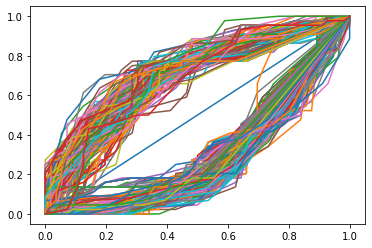

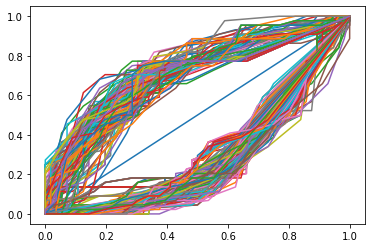

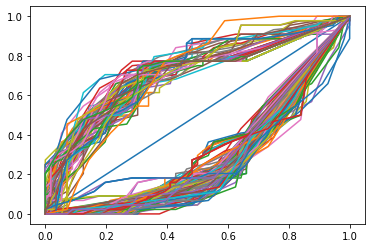

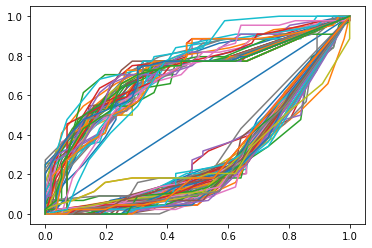

In [16]:
import matplotlib.pyplot as plt
t = np.arange(0, 1, 0.001)

for a_level in [0.17, 0.18, 0.19, 0.2]:
  plt.plot(t, t)
  for f_index in auc_feature_selection_collection[a_level]:
    auc_result, alpha, One_Beta = auc_feature_selction(train_dataset, train_label, f_index, 0.2)
    plt.plot(alpha, One_Beta)
  plt.show()

plt.show()